## Use BioKEEN Programmatically to Train and Evalaute a KGE Model on ADEPTUS

In [1]:
import logging
import os
import sys
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import biokeen
import pykeen

In [2]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('biokeen').setLevel(logging.INFO)

In [3]:
print(sys.version)

3.6.4 (default, Mar  1 2018, 18:36:50) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]


In [4]:
print(time.asctime())

Sat Jan 12 11:58:14 2019


In [5]:
output_directory = os.path.join(
    os.path.expanduser('~'), 
    'Desktop', 
    'biokeen_test'
)

**Step 1**: Configure your experiment

In [6]:
config = dict(
    training_set_path           = '/Users/mehdi/PycharmProjects/BioKEEN/data/adeptus.keen.tsv',
    execution_mode              = 'Training_mode',  
    kg_embedding_model_name     = 'TransE',
    embedding_dim               = 50, 
    normalization_of_entities   = 2,  # corresponds to L2
    scoring_function            = 1,  # corresponds to L1
    margin_loss                 = 1,
    learning_rate               = 0.01,
    batch_size                  = 128,
    num_epochs                  = 1000,  
    test_set_ratio              = 0.1,
    filter_negative_triples     = True,
    random_seed                 = 2,
    preferred_device            = 'cpu',
)

In [7]:
config

{'training_set_path': '/Users/mehdi/PycharmProjects/BioKEEN/data/adeptus.keen.tsv',
 'execution_mode': 'Training_mode',
 'kg_embedding_model_name': 'TransE',
 'embedding_dim': 50,
 'normalization_of_entities': 2,
 'scoring_function': 1,
 'margin_loss': 1,
 'learning_rate': 0.01,
 'batch_size': 128,
 'num_epochs': 1000,
 'test_set_ratio': 0.1,
 'filter_negative_triples': True,
 'random_seed': 2,
 'preferred_device': 'cpu'}

**Step 2**: Run BioKEEN to Train and Evaluate the Model

In [8]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training the model (epochs): 100%|██████████| 1000/1000 [02:51<00:00,  6.06it/s]
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:evaluation took 22.28s seconds


In [9]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration'])

**Step 3**: Show Exported Results

**3.1**: Show Trained Model

In [10]:
results.results['trained_model']

TransE(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(3696, 50)
  (relation_embeddings): Embedding(2, 50)
)

**3.2**: Plot losses

In [11]:
losses = results.results['losses']

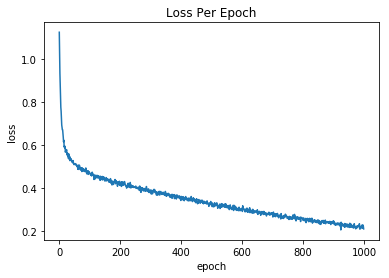

In [12]:
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [13]:
results.results['eval_summary']

OrderedDict([('mean_rank', 866.5242424242424),
             ('hits@k',
              {1: 0.02727272727272727,
               3: 0.11717171717171718,
               5: 0.2,
               10: 0.31313131313131315})])